In [1]:
import os
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.stats import gaussian_kde

In [2]:
def get_true_log_probs(directory, true_param):
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    log_probs = []
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/thetas.pkl', 'rb') as f:
                thetas = jnp.array(pkl.load(f))
                thetas = jnp.concatenate(thetas, axis=0)
                thetas = jnp.transpose(thetas)
                kde = gaussian_kde(thetas, bw_method='silverman')
                log_prob = kde.logpdf(true_param)
                log_probs.append(log_prob)
        except Exception as e:
            print(e)
            continue
    return log_probs


In [4]:
def get_true_log_probs_slcp(directory, true_param):
    # same but with theta.pkl ... my bad
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    log_probs = []
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/theta.pkl', 'rb') as f:
                thetas = jnp.array(pkl.load(f))
                thetas = jnp.concatenate(thetas, axis=0)
                thetas = jnp.transpose(thetas)
                kde = gaussian_kde(thetas, bw_method='silverman')
                log_prob = kde.logpdf(true_param)
                log_probs.append(log_prob)
        except Exception as e:
            print(e)
            continue
    return log_probs


In [5]:
true_param = jnp.array([1.0])

directory = '../res/contaminated_normal/rsnl/'
true_log_probs_rsnl = get_true_log_probs(directory, true_param)
true_log_probs_rsnl = np.squeeze(np.array(true_log_probs_rsnl))
true_log_probs_rsnl_normal = true_log_probs_rsnl

directory = '../res/contaminated_normal/snl/'
true_log_probs_snl = get_true_log_probs(directory, true_param)
true_log_probs_snl = np.squeeze(np.array(true_log_probs_snl))
true_log_probs_snl_normal = true_log_probs_snl
# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         title="Contaminated normal")

<Figure size 600x900 with 0 Axes>

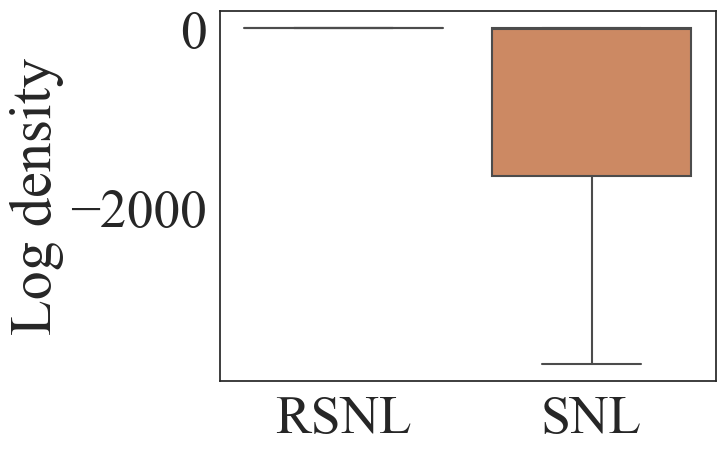

In [6]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df['logprob'] = np.concatenate([true_log_probs_rsnl, true_log_probs_snl])
df['method'] = ['RSNL'] * len(true_log_probs_rsnl) + ['SNL'] * len(true_log_probs_snl)
# with sns.plotting_context({'font.size': 20}):
plt.figure(figsize=(6, 9))  # Adjust the figure size as needed
plt.rcParams["axes.labelsize"] = 15

sns.set(font_scale=3.5, font='Times New Roman', style='white')
fig, ax = plt.subplots()
ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False)
ax.set(xlabel='', ylabel='Log density')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.plot()
plt.savefig('contaminated_normal_boxplots.pdf', bbox_inches='tight')


In [7]:
true_param = jnp.array([0.0])

directory = '../res/misspec_ma1/rsnl/'
true_log_probs_rsnl = get_true_log_probs(directory, true_param)
true_log_probs_rsnl = np.squeeze(np.array(true_log_probs_rsnl))
true_log_probs_rsnl_ma1 = true_log_probs_rsnl

directory = '../res/misspec_ma1/snl/'
true_log_probs_snl = get_true_log_probs(directory, true_param)
true_log_probs_snl = np.squeeze(np.array(true_log_probs_snl))
true_log_probs_snl_ma1 = true_log_probs_snl
# plt.boxplot([true_log_probs_rsnl, true_log_probs_snl], labels=['RSNL', 'SNL'],
#             showfliers=False)

# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         title="Contaminated normal")

<Figure size 600x900 with 0 Axes>

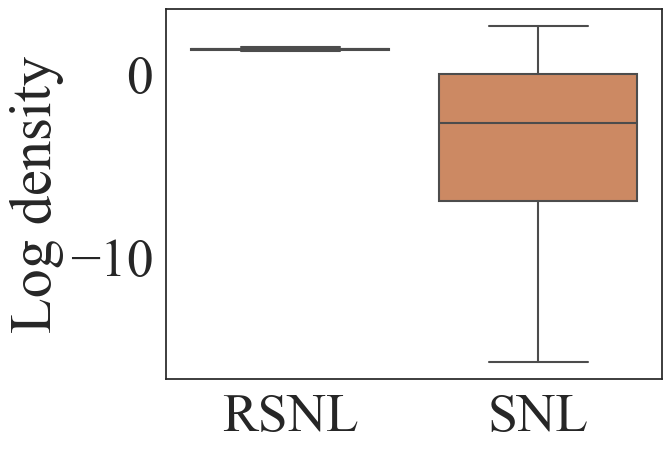

In [8]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df['logprob'] = np.concatenate([true_log_probs_rsnl, true_log_probs_snl])
df['method'] = ['RSNL'] * len(true_log_probs_rsnl) + ['SNL'] * len(true_log_probs_snl)
# with sns.plotting_context({'font.size': 20}):
plt.rcParams["axes.labelsize"] = 15
plt.figure(figsize=(6, 9))  # Adjust the figure size as needed

sns.set(font_scale=3.5, font='Times New Roman', style='white')
fig, ax = plt.subplots()
ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False)
ax.set(xlabel='', ylabel='Log density')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.plot()
plt.savefig('misspec_ma1_boxplots.pdf', bbox_inches='tight')

In [9]:
true_param = jnp.array([0.7, -2.9, -1.0, -0.9, 0.6])

directory = '../res/contaminated_slcp/rsnl/'
true_log_probs_rsnl = get_true_log_probs_slcp(directory, true_param)
true_log_probs_rsnl = np.squeeze(np.array(true_log_probs_rsnl))
true_log_probs_rsnl_slcp = true_log_probs_rsnl

directory = '../res/contaminated_slcp/snl/'
true_log_probs_snl = get_true_log_probs_slcp(directory, true_param)
true_log_probs_snl = np.squeeze(np.array(true_log_probs_snl))
true_log_probs_snl_slcp = true_log_probs_snl
# plt.boxplot([true_log_probs_rsnl, true_log_probs_snl], labels=['RSNL', 'SNL'],
#             showfliers=False)

# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         title="Contaminated normal")

<Figure size 600x900 with 0 Axes>

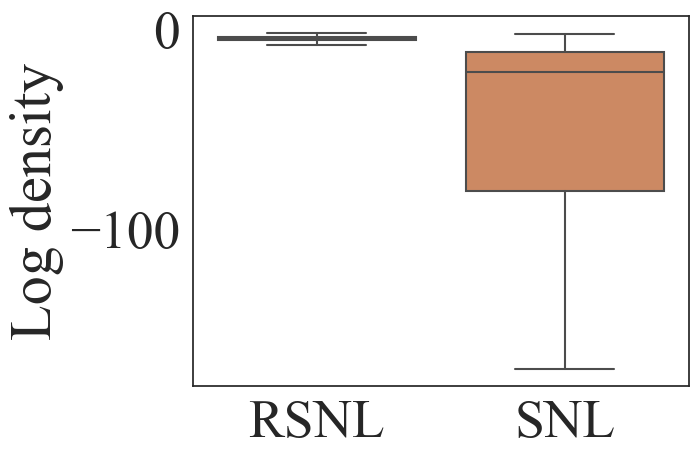

In [10]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df['logprob'] = np.concatenate([true_log_probs_rsnl, true_log_probs_snl])
df['method'] = ['RSNL'] * len(true_log_probs_rsnl) + ['SNL'] * len(true_log_probs_snl)
# with sns.plotting_context({'font.size': 20}):
plt.rcParams["axes.labelsize"] = 15
plt.figure(figsize=(6, 9))  # Adjust the figure size as needed

sns.set(font_scale=3.5, font='Times New Roman', style='white')
fig, ax = plt.subplots()
ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False)
ax.set(xlabel='', ylabel='Log density')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.plot()
plt.savefig('contaminated_slcp_boxplots.pdf', bbox_inches='tight')


In [11]:
true_param = jnp.array([0.1, 0.15])

directory = '../res/sir/rsnl/'
true_log_probs_rsnl = get_true_log_probs(directory, true_param)
true_log_probs_rsnl = np.squeeze(np.array(true_log_probs_rsnl))
true_log_probs_rsnl_sir = true_log_probs_rsnl

directory = '../res/sir/snl/'
true_log_probs_snl = get_true_log_probs(directory, true_param)
true_log_probs_snl = np.squeeze(np.array(true_log_probs_snl))
true_log_probs_snl_sir = true_log_probs_snl

<Figure size 600x900 with 0 Axes>

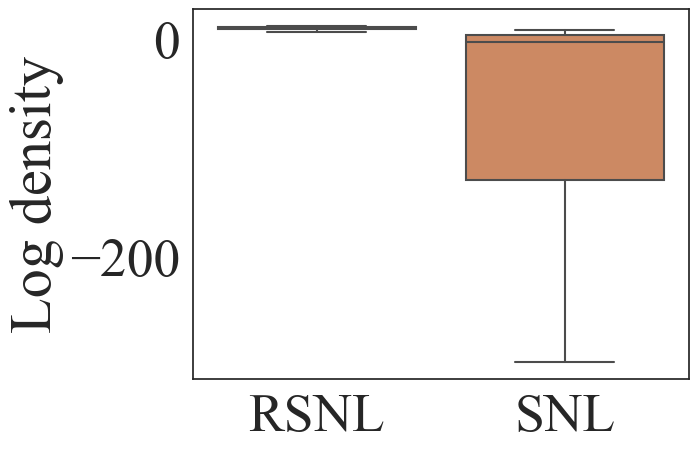

In [12]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df['logprob'] = np.concatenate([true_log_probs_rsnl, true_log_probs_snl])
df['method'] = ['RSNL'] * len(true_log_probs_rsnl) + ['SNL'] * len(true_log_probs_snl)
# with sns.plotting_context({'font.size': 20}):
plt.figure(figsize=(6, 9))  # Adjust the figure size as needed
plt.rcParams["axes.labelsize"] = 15

sns.set(font_scale=3.5, font='Times New Roman', style='white')
fig, ax = plt.subplots()
ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False)
ax.set(xlabel='', ylabel='Log density')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.plot()
plt.savefig('sir_boxplots.pdf', bbox_inches='tight')


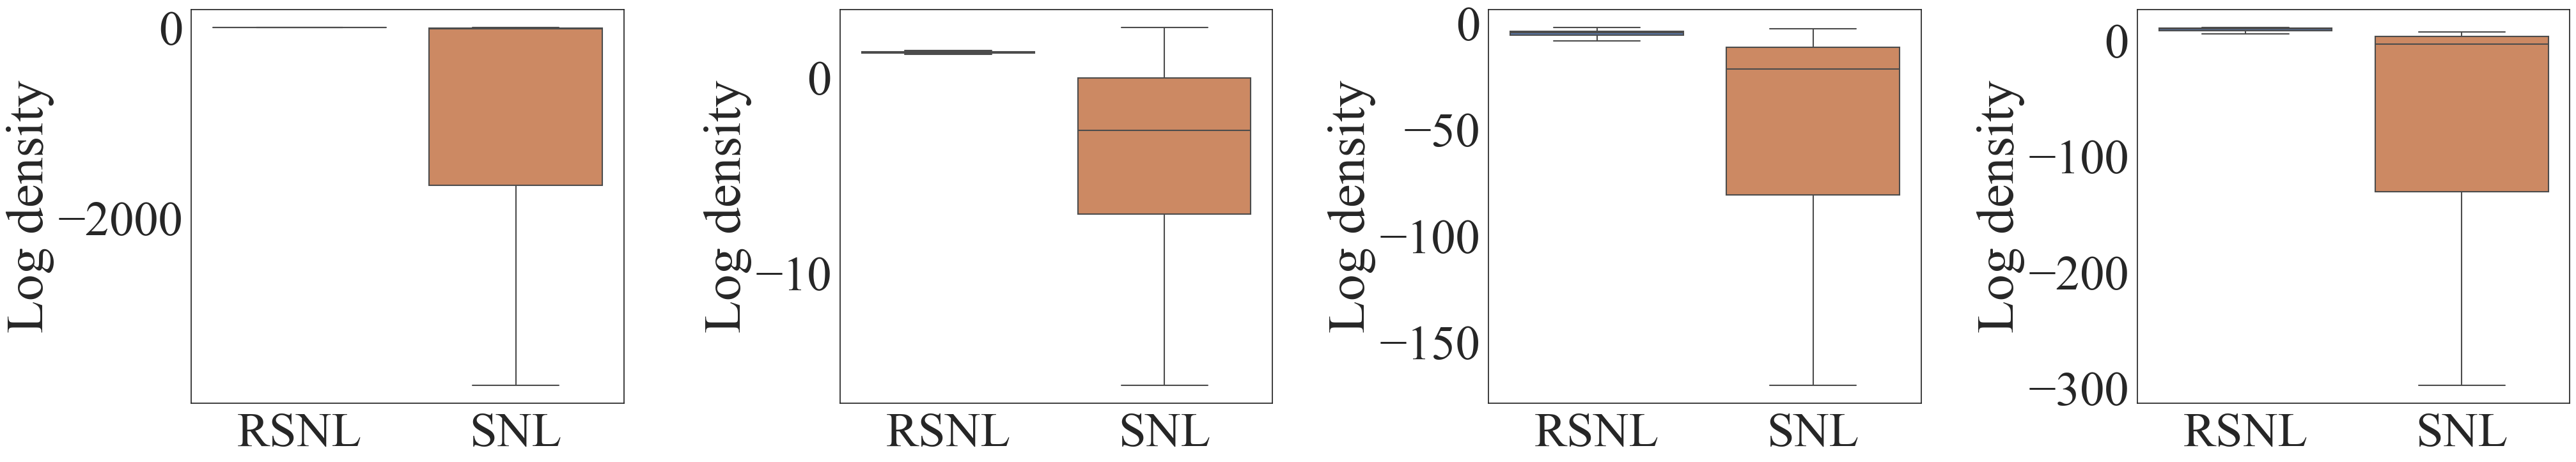

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(48, 8), sharey=False)  #  6 .. 1
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 35})
plt.rcParams['xtick.labelsize'] = 35


true_log_probs_rsnl_all = [true_log_probs_rsnl_normal, true_log_probs_rsnl_ma1, true_log_probs_rsnl_slcp, true_log_probs_rsnl_sir]
true_log_probs_snl_all = [true_log_probs_snl_normal, true_log_probs_snl_ma1, true_log_probs_snl_slcp, true_log_probs_snl_sir]

for i in range(4):
    df = pd.DataFrame()
    df['logprob'] = np.concatenate([true_log_probs_rsnl_all[i], true_log_probs_snl_all[i]])
    df['method'] = ['RSNL'] * len(true_log_probs_rsnl_all[i]) + ['SNL'] * len(true_log_probs_snl_all[i])
    # with sns.plotting_context({'font.size': 20}):
    plt.rcParams["axes.labelsize"] = 35

    sns.set(font_scale=5, font='Times New Roman', style='white')
    # fig, ax = plt.subplots()
    ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False, ax=axs[i])
    ax.set(xlabel='', ylabel='Log density')
    # plt.savefig("boxplots_all.pdf", bbox_inches='tight')
    # axs[i] = ax
plt.subplots_adjust(wspace=0.5)  # adjust the space between the subplots
plt.savefig("boxplots_all.pdf", bbox_inches='tight')

In [3]:
true_param = jnp.array([1.0])

directory = '../res/contaminated_normal/rsnl_well_specified/'
true_log_probs_rsnl = get_true_log_probs(directory, true_param)
true_log_probs_rsnl = np.squeeze(np.array(true_log_probs_rsnl))
true_log_probs_rsnl_sir = true_log_probs_rsnl

directory = '../res/contaminated_normal/snl_well_specified/'
true_log_probs_snl = get_true_log_probs(directory, true_param)
true_log_probs_snl = np.squeeze(np.array(true_log_probs_snl))
true_log_probs_snl_sir = true_log_probs_snl

<Figure size 600x900 with 0 Axes>

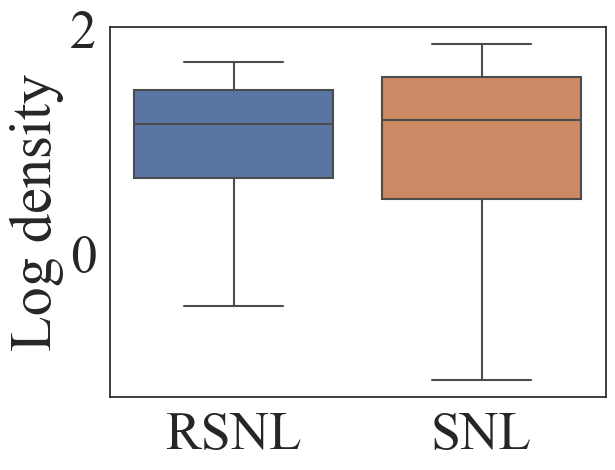

In [5]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df['logprob'] = np.concatenate([true_log_probs_rsnl, true_log_probs_snl])
df['method'] = ['RSNL'] * len(true_log_probs_rsnl) + ['SNL'] * len(true_log_probs_snl)
# with sns.plotting_context({'font.size': 20}):
plt.figure(figsize=(6, 9))  # Adjust the figure size as needed
plt.rcParams["axes.labelsize"] = 15

sns.set(font_scale=3.5, font='Times New Roman', style='white')
fig, ax = plt.subplots()
ax = sns.boxplot(x='method', y='logprob', data=df, showfliers = False)
ax.set(xlabel='', ylabel='Log density')
# ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1))
plt.plot()
plt.savefig('well_specified_normal_boxplots.pdf', bbox_inches='tight')
